In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import Image, display
import re

In [2]:
df=pd.read_csv("/content/dataset.csv")

In [3]:
df.shape

(1019, 12)

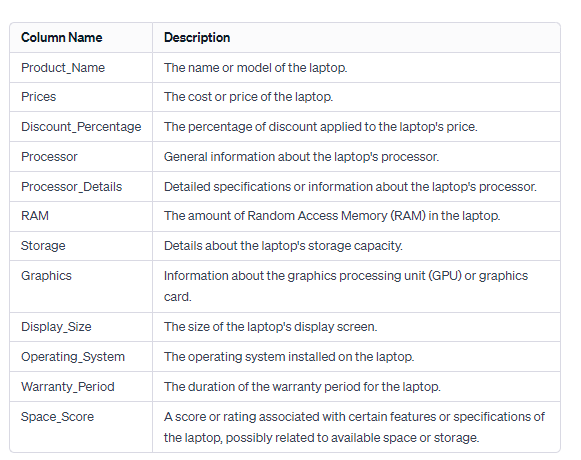

In [4]:
# Column desc
image_path = '/content/Capture.PNG'
display(Image(filename=image_path))

In [5]:
# Observation

# New columns for 'Brand_name' and 'Product_name' have been created - Completed.
# The 'Ram' column appears to have incorrect data; we need to extract RAM information from the 'Product_Name' column.
# Two columns, 'RAM' and 'Storage,' have been deleted as they are from the previous dataset.
# The '%' sign needs to be removed from the 'Discount_Percentage' column.
# The 'Processor' name column contains working values that need to be extracted from the 'Product_Name' column.
# Columns 'Display_Size' and 'Processor_Details' contain incorrectly scraped data; these columns will be deleted.
# In the 'Ram' and 'Storage' columns, we need to keep only the numerical values.
# We need to work on the 'Processor' column to create separate features for cores and generation."

In [6]:
df.head(5)

,Product_Name,prices,Discount_Percentage,processor,Processor_Details,RAM,Storage,Graphics,Display_Size,Operating_System,Warranty_Period,Space_Score
0,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",32%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",19%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN
2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,"₹36,990",4%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN
3,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,"₹59,990",19%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN
4,HP 15s-fr5011TU Laptop (12th Gen Core i5/ 16GB...,"₹53,990",3%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Name         1019 non-null   object 
 1   prices               1019 non-null   object 
 2   Discount_Percentage  781 non-null    object 
 3   processor            1019 non-null   object 
 4   Processor_Details    1019 non-null   object 
 5   RAM                  1019 non-null   object 
 6   Storage              1019 non-null   object 
 7   Graphics             1019 non-null   object 
 8   Display_Size         1019 non-null   object 
 9   Operating_System     1019 non-null   object 
 10  Warranty_Period      1019 non-null   object 
 11  Space_Score          308 non-null    float64
dtypes: float64(1), object(11)
memory usage: 95.7+ KB


In [8]:
# # droping unname column
# df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.columns

Index(['Product_Name', 'prices', 'Discount_Percentage', 'processor',
       'Processor_Details', 'RAM', 'Storage', 'Graphics', 'Display_Size',
       'Operating_System', 'Warranty_Period', 'Space_Score'],
      dtype='object')

In [10]:
df.head(1)

,Product_Name,prices,Discount_Percentage,processor,Processor_Details,RAM,Storage,Graphics,Display_Size,Operating_System,Warranty_Period,Space_Score
0,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",32%,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16 GB LPDDR4 RAM,512 GB SSD,Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN


In [11]:
# drop Ram col
df.drop(columns=['RAM'],inplace=True)
df.drop(columns=['Storage'],inplace=True)
df.drop(columns=['processor'],inplace=True)

In [12]:
Brand_name=df['Product_Name'].str.split("(").str.get(0).str.split(" ").str.get(0)
Brand_detail_name=df['Product_Name'].str.split("(").str.get(0)

In [13]:
df.insert(0, 'Brand_name', Brand_name)
df.insert(1, 'Brand_detail_name', Brand_detail_name)

In [14]:
df.head(1)

,Brand_name,Brand_detail_name,Product_Name,prices,Discount_Percentage,Processor_Details,Graphics,Display_Size,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",32%,"Quad Core, 8 Threads",Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN


In [15]:
RAM=df['Product_Name'].str.split('/').str.get(1)
Storage=df['Product_Name'].str.split('/').str.get(2).str.split(" ").str.get(1)
Has_ssd=df['Product_Name'].str.split('/').str.get(2).str.split(" ").str.get(2)

In [16]:
df.insert(4, 'RAM', RAM)
df.insert(5, 'Storage', Storage)
df.insert(6, 'Has_ssd', Has_ssd)

In [17]:
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace('%', '').astype(float)


In [18]:
processor=df['Product_Name'].str.split('(').str.get(1).str.split('/').str.get(0)

In [19]:
df.insert(7, 'processor', processor)

In [20]:
df.head(1)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Processor_Details,Graphics,Display_Size,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",16GB,512GB,SSD,11th Gen Core i5,32.0,"Quad Core, 8 Threads",Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,NaN


In [21]:
df['Warranty_Period']=df['Warranty_Period'].str.replace(' Year Warranty','')

In [22]:
df.head(1)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Processor_Details,Graphics,Display_Size,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",16GB,512GB,SSD,11th Gen Core i5,32.0,"Quad Core, 8 Threads",Intel UHD Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1,NaN


In [23]:
df['Display_Size']
# There is only one repeating text in every row, so I am deleting this column.

0       15.6 inches, 1920 x 1080 pixels
1       15.6 inches, 1920 x 1080 pixels
2       15.6 inches, 1920 x 1080 pixels
3       15.6 inches, 1920 x 1080 pixels
4       15.6 inches, 1920 x 1080 pixels
                     ...               
1014    15.6 inches, 1920 x 1080 pixels
1015    15.6 inches, 1920 x 1080 pixels
1016    15.6 inches, 1920 x 1080 pixels
1017    15.6 inches, 1920 x 1080 pixels
1018    15.6 inches, 1920 x 1080 pixels
Name: Display_Size, Length: 1019, dtype: object

In [24]:
df.drop(columns='Display_Size',inplace=True)

In [25]:
# Checking df here

df.head(2)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Processor_Details,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",16GB,512GB,SSD,11th Gen Core i5,32.0,"Quad Core, 8 Threads",Intel UHD Graphics,Windows 11 OS,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",8GB,512GB,SSD,11th Gen Core i3,19.0,"Quad Core, 8 Threads",Intel UHD Graphics,Windows 11 OS,1,NaN


In [26]:
df['Processor_Details'].value_counts()
# need to delete this col

Quad Core, 8 Threads    1019
Name: Processor_Details, dtype: int64

In [27]:
df.drop(columns='Processor_Details',inplace=True)

In [28]:
df.head(2)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,"₹29,990",16GB,512GB,SSD,11th Gen Core i5,32.0,Intel UHD Graphics,Windows 11 OS,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",8GB,512GB,SSD,11th Gen Core i3,19.0,Intel UHD Graphics,Windows 11 OS,1,NaN


In [29]:
# need to check Operating_System col
# we have win11 for all leptops

df['Operating_System']=df['Operating_System'].str.split(' ').str.get(1)

In [30]:
df['prices']=df['prices'].str.replace('₹','').str.replace(',','').astype('int')

In [31]:
df.head(2)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,29990,16GB,512GB,SSD,11th Gen Core i5,32.0,Intel UHD Graphics,11,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,8GB,512GB,SSD,11th Gen Core i3,19.0,Intel UHD Graphics,11,1,NaN


In [32]:
df['RAM'].value_counts()

 16GB         498
 8GB          372
 32GB          61
 4GB           23
 16 GB RAM     21
 8 GB           9
 8 GB RAM       5
16GB            5
 64GB           4
 18GB           3
 32 GB RAM      3
 12GB           3
 16 GB          3
 36GB           2
8GB             1
12GB RAM        1
 16GB RAM       1
 48GB           1
 8GB RAM        1
 DDR5 RAM       1
Name: RAM, dtype: int64

In [33]:
df['RAM']=df['RAM'].str.extract(r'(\d+)')
# we extact the only number of RAM col

In [34]:
df['RAM'].value_counts()

16    528
8     388
32     64
4      23
12      4
64      4
18      3
36      2
48      1
5       1
Name: RAM, dtype: int64

In [35]:
df.head(2)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,29990,16,512GB,SSD,11th Gen Core i5,32.0,Intel UHD Graphics,11,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,8,512GB,SSD,11th Gen Core i3,19.0,Intel UHD Graphics,11,1,NaN


In [36]:
temp_df=df[df['Storage']=='SSD']['Product_Name']
temp_df=temp_df.str.split('(').str.get(1).str.split('/').str.get(2).str.split(" ").str.get(0)
df.loc[temp_df.index,['Storage']]=temp_df

In [37]:
df['Storage'].value_counts()
# nee to change 1TB into GB

512GB    661
1TB      230
256GB     38
512       36
2TB       14
128GB     14
1          8
64GB       7
256        5
GB         2
4TB        1
64B        1
2          1
Name: Storage, dtype: int64

In [38]:
gb=df[df['Storage'].str.contains('GB', na=False)]
temp_df=gb['Storage'].str.replace('GB','')
df.loc[temp_df.index,['Storage']]=temp_df

In [39]:
# TB change in GB
tb=df[df['Storage'].str.contains('TB', na=False)]
temp_df=tb['Storage'].str.replace('TB','').astype('int')*1024
df.loc[temp_df.index,['Storage']]=temp_df

In [40]:
temp=df[df['Storage']=='1']
temp=temp['Storage'].astype('int')*1024
df.loc[temp.index,['Storage']]=temp

In [41]:
temp_df=df[df['Storage']=='64B']
temp_df=temp_df['Storage'].str.replace('B','')
df.loc[temp_df.index,['Storage']]=temp_df


temp_df=df[df['Storage']=='2']
temp_df=temp_df['Storage'].astype('int')*1024
df.loc[temp_df.index,['Storage']]=temp_df

In [42]:
df['Storage'].isnull().sum()

1

In [43]:
# Iam droping 4 row from current dataset and making new dataset
dataset=df[df['Storage'].isin(['512', '1024', '256', '2048', '128', '64',1024,2048])].copy()

In [44]:
dataset.shape

(1015, 13)

In [45]:
dataset.head(5)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,29990,16,512,SSD,11th Gen Core i5,32.0,Intel UHD Graphics,11,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,8,512,SSD,11th Gen Core i3,19.0,Intel UHD Graphics,11,1,NaN
2,HP,HP 15s-fq5007TU Laptop,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,36990,8,512,SSD,12th Gen Core i3,4.0,Intel UHD Graphics,11,1,NaN
3,Infinix,Infinix Zerobook 2023 Laptop,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,59990,32,1024,SSD,13th Gen Core i9,19.0,Intel UHD Graphics,11,1,NaN
4,HP,HP 15s-fr5011TU Laptop,HP 15s-fr5011TU Laptop (12th Gen Core i5/ 16GB...,53990,16,512,SSD,12th Gen Core i5,3.0,Intel UHD Graphics,11,1,NaN


In [46]:
dataset['Has_ssd'].value_counts()

SSD      922
GB        41
eMMC      17
256GB     13
TB         9
HDD        2
512GB      2
Name: Has_ssd, dtype: int64

In [47]:
dataset[dataset['Has_ssd']=='512GB']

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
647,‎HP,‎HP Zbook Power G4-A 2023 ZHAN 99 Laptop,‎HP Zbook Power G4-A 2023 ZHAN 99 Laptop (AMD ...,115706,16,1024,512GB,AMD Ryzen 5 6600H,NaN,Intel UHD Graphics,11,1,NaN
953,Acer,Acer Nitro 5 AN515-58 2023 Gaming Laptop,Acer Nitro 5 AN515-58 2023 Gaming Laptop (12th...,98999,16,1024,512GB,12th Gen Core i7,NaN,Intel UHD Graphics,11,1,NaN


In [48]:
dataset['Has_ssd']=dataset['Product_Name'].str.split('(').str.get(1).str.contains('SSD')
dataset['Has_ssd']=dataset['Has_ssd'].fillna(0)
dataset['Has_ssd'] = dataset['Has_ssd'].astype(int)

In [49]:
# Need to work on processor Columns
# Need to create one features for core and once for generation
# dataset['processor'].value_counts()
Core=dataset['processor'].str.split(' ').str.get(3)
dataset.insert(8, 'Core', Core)
mask = ~dataset['Core'].isin(['i5', 'i7', 'i3', 'i9'])
dataset.loc[mask, 'Core'] = np.nan


# Make-Generation columns
Gen=dataset['processor'].str.split(' ').str.get(0)
Gen=dataset['processor'].str.split(' ').str.get(0).str.replace('th','')
dataset.insert(9, 'Gen', Gen)
mask = ~dataset['Gen'].isin(['13', '12', '11', '10','14','9'])
dataset.loc[mask, 'Gen'] = np.nan
dataset['Gen'].value_counts()

13    281
12    250
11    135
10      9
14      5
9       1
Name: Gen, dtype: int64

In [50]:
dataset.head(2)

,Brand_name,Brand_detail_name,Product_Name,prices,RAM,Storage,Has_ssd,processor,Core,Gen,Discount_Percentage,Graphics,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i5/ 16...,29990,16,512,1,11th Gen Core i5,i5,11,32.0,Intel UHD Graphics,11,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,8,512,1,11th Gen Core i3,i3,11,19.0,Intel UHD Graphics,11,1,NaN


In [51]:
dataset['Graphics'].value_counts()

Intel UHD Graphics    1015
Name: Graphics, dtype: int64

In [52]:
# We need to drop some columns because we have incorrect data or some columns that have already been used, which were derived from another column named

In [53]:
dataset=dataset.drop(columns=['processor', 'Graphics', 'Product_Name'])

In [54]:
dataset.head(5)

,Brand_name,Brand_detail_name,prices,RAM,Storage,Has_ssd,Core,Gen,Discount_Percentage,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,29990,16,512,1,i5,11,32.0,11,1,NaN
1,Tecno,Tecno Megabook T1 Laptop,23990,8,512,1,i3,11,19.0,11,1,NaN
2,HP,HP 15s-fq5007TU Laptop,36990,8,512,1,i3,12,4.0,11,1,NaN
3,Infinix,Infinix Zerobook 2023 Laptop,59990,32,1024,1,i9,13,19.0,11,1,NaN
4,HP,HP 15s-fr5011TU Laptop,53990,16,512,1,i5,12,3.0,11,1,NaN


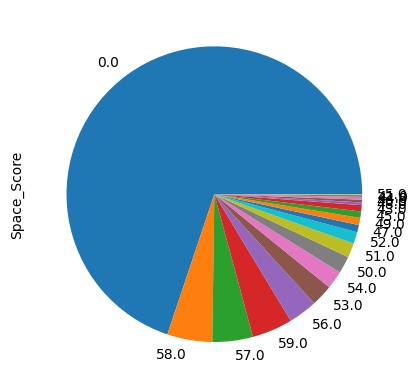

In [55]:
dataset['Space_Score'].isnull().sum()
# We need to replace null values with zero because we do not have a space score for these row
dataset['Space_Score']=dataset['Space_Score'].fillna(0)
dataset['Space_Score'].value_counts().plot(kind='pie')
plt.show()

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1018
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand_name           1015 non-null   object 
 1   Brand_detail_name    1015 non-null   object 
 2   prices               1015 non-null   int64  
 3   RAM                  1015 non-null   object 
 4   Storage              1015 non-null   object 
 5   Has_ssd              1015 non-null   int64  
 6   Core                 681 non-null    object 
 7   Gen                  681 non-null    object 
 8   Discount_Percentage  778 non-null    float64
 9   Operating_System     1015 non-null   object 
 10  Warranty_Period      1015 non-null   object 
 11  Space_Score          1015 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 103.1+ KB


In [57]:
# Need to convert some col object to int32

dataset['RAM']=dataset['RAM'].astype('int32')
dataset['Storage']=dataset['Storage'].astype('int32')
dataset['Warranty_Period']=dataset['Warranty_Period'].astype('int32')
dataset['Space_Score']=dataset['Space_Score'].astype('int32')

In [58]:
dataset.head(10)

,Brand_name,Brand_detail_name,prices,RAM,Storage,Has_ssd,Core,Gen,Discount_Percentage,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,29990,16,512,1,i5,11,32.0,11,1,0
1,Tecno,Tecno Megabook T1 Laptop,23990,8,512,1,i3,11,19.0,11,1,0
2,HP,HP 15s-fq5007TU Laptop,36990,8,512,1,i3,12,4.0,11,1,0
3,Infinix,Infinix Zerobook 2023 Laptop,59990,32,1024,1,i9,13,19.0,11,1,0
4,HP,HP 15s-fr5011TU Laptop,53990,16,512,1,i5,12,3.0,11,1,0
5,Asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Laptop,49990,8,512,1,i5,11,6.0,11,1,0
6,Samsung,Samsung Galaxy Book2 Pro 13 Laptop,64990,16,512,1,i5,12,8.0,11,1,0
7,Apple,Apple MacBook Air 2020 MGND3HN Laptop,74990,8,256,1,NaN,NaN,6.0,11,1,45
8,HP,HP Victus 15-fb0157AX Gaming Laptop,50999,8,512,1,NaN,NaN,3.0,11,1,0
9,HP,HP Victus 16-s0094AX Gaming Laptop,80990,16,1024,1,NaN,NaN,5.0,11,1,0


**`Starting EDA Part from here`**

In [59]:
dataset.shape

(1015, 12)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1018
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand_name           1015 non-null   object 
 1   Brand_detail_name    1015 non-null   object 
 2   prices               1015 non-null   int64  
 3   RAM                  1015 non-null   int32  
 4   Storage              1015 non-null   int32  
 5   Has_ssd              1015 non-null   int64  
 6   Core                 681 non-null    object 
 7   Gen                  681 non-null    object 
 8   Discount_Percentage  778 non-null    float64
 9   Operating_System     1015 non-null   object 
 10  Warranty_Period      1015 non-null   int32  
 11  Space_Score          1015 non-null   int32  
dtypes: float64(1), int32(4), int64(2), object(5)
memory usage: 87.2+ KB


In [61]:
df.describe()

,prices,Discount_Percentage,Space_Score
count,1019.000000,781.000000,308.000000
mean,83586.289500,5.428937,54.376623
std,70777.998807,5.126265,4.378029
min,11990.000000,1.000000,41.000000
25%,43095.000000,2.000000,52.000000
50%,61990.000000,4.000000,56.000000
75%,93595.000000,7.000000,58.000000
max,599990.000000,38.000000,59.000000


In [62]:
dataset.head(1)

,Brand_name,Brand_detail_name,prices,RAM,Storage,Has_ssd,Core,Gen,Discount_Percentage,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,29990,16,512,1,i5,11,32.0,11,1,0


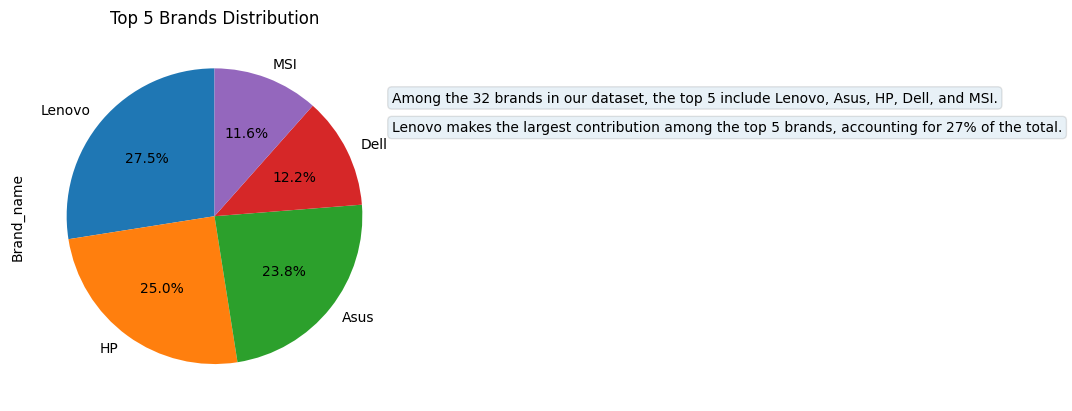

In [63]:
# Need to check Brand Wise leptop count (Top 5)

(dataset['Brand_name'].value_counts()/dataset['Brand_name'].shape[0])*100
dataset['Brand_name'].value_counts().head().plot(kind='pie',autopct='%1.1f%%', startangle=90)

plt.text(1.2, 0.8, 'Among the 32 brands in our dataset, the top 5 include Lenovo, Asus, HP, Dell, and MSI.', fontsize=10, ha='left', va='center', bbox=dict(boxstyle='round', alpha=0.1))
plt.text(1.2, 0.6, 'Lenovo makes the largest contribution among the top 5 brands, accounting for 27% of the total.', fontsize=10, ha='left', va='center', bbox=dict(boxstyle='round', alpha=0.1))
plt.title('Top 5 Brands Distribution')
plt.show()


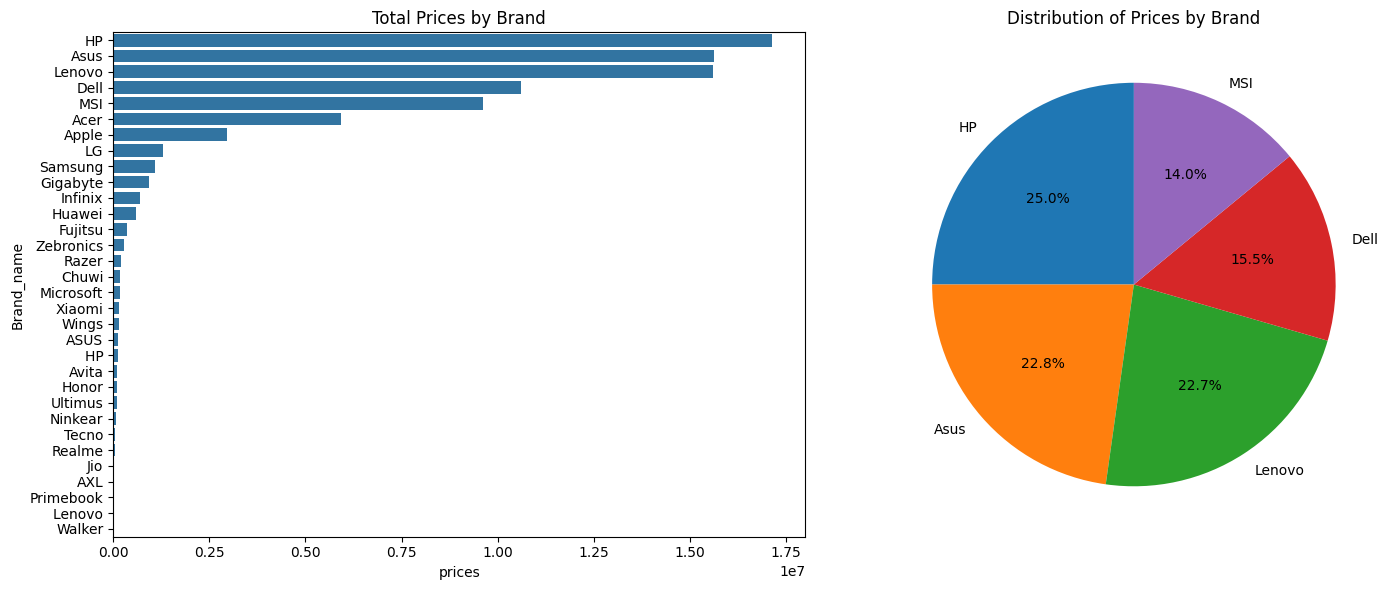

In [64]:
plt.figure(figsize=(15, 6))

# Barplot
plt.subplot(121)
gp_prices = dataset.groupby(by='Brand_name')['prices'].sum().reset_index().sort_values('prices', ascending=False)
sn.barplot(data=gp_prices, y='Brand_name', x='prices')
plt.title('Total Prices by Brand')

# Pie chart
plt.subplot(122)
gp_prices = gp_prices.head()
plt.pie(gp_prices['prices'], labels=gp_prices['Brand_name'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Prices by Brand')

# Adjust layout
plt.tight_layout()



# **Analysis**
# HP laptops dominate in total prices, surpassing competitors like Asus, Lenovo, and Dell, highlighting their prominence in the dataset.
# HP laptops dominate the distribution, representing a significant 25% of the total prices, emphasizing their substantial presence in the dataset.


In [65]:
dataset.head(1)

,Brand_name,Brand_detail_name,prices,RAM,Storage,Has_ssd,Core,Gen,Discount_Percentage,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,29990,16,512,1,i5,11,32.0,11,1,0


In [66]:
dataset['prices'].describe()



# Laptops in the dataset span a broad price spectrum, from a minimum of 11,000 to a maximum of 590,000.
# The mean price, at 83,000, provides a central reference in understanding prevailing pricing trends.


count      1015.000000
mean      83137.399015
std       69584.380839
min       11990.000000
25%       43208.000000
50%       61990.000000
75%       92990.000000
max      599990.000000
Name: prices, dtype: float64

<ipython-input-67-5279083467de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(dataset.corr())


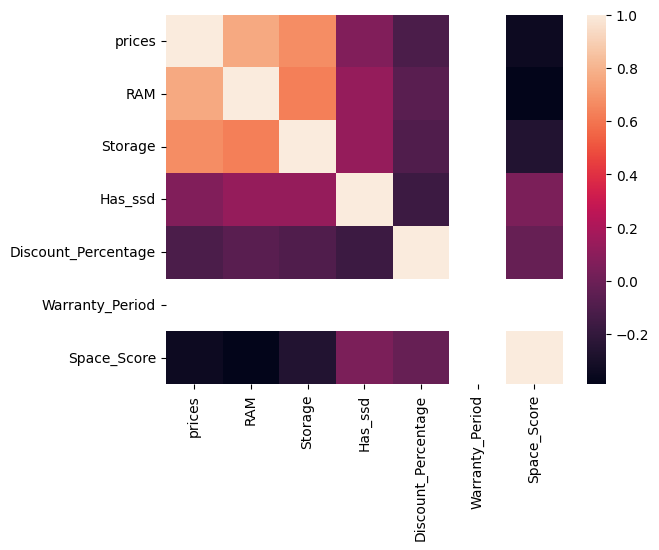

In [67]:
# Check corr of the dataset

sn.heatmap(dataset.corr())
plt.show()

# There is a strong correlation between increasing laptop prices and the corresponding increase in RAM,
# indicating a positive relationship between these two variables.


<Axes: title={'center': 'RAM VS Prices'}, xlabel='RAM', ylabel='prices'>

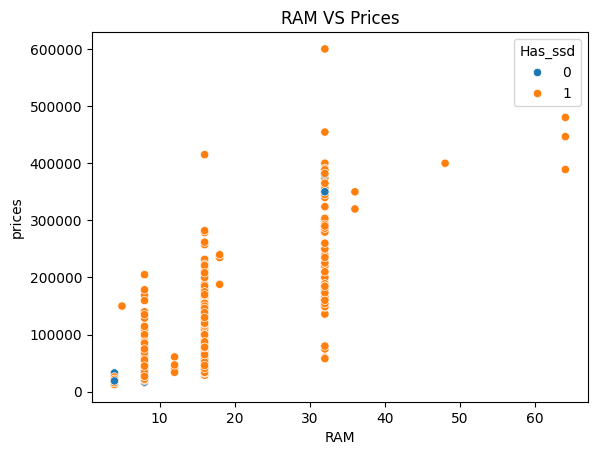

In [116]:
# scatter plot ram vs pricess
plt.title("RAM VS Prices")
sn.scatterplot(data=dataset,x='RAM',y='prices',hue='Has_ssd')

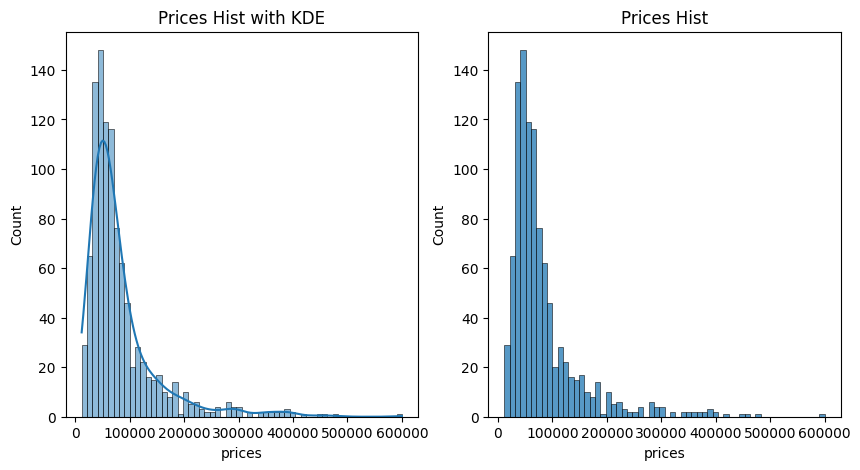

In [119]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Prices Hist with KDE')
sn.histplot(dataset['prices'], kde=True)

plt.subplot(122)
plt.title('Prices Hist')
sn.histplot(dataset['prices'])

plt.show()


# Analysis
# In the graph below, we observe a higher concentration of data points in the range of 0 to 1 L.

# This is logical because the count of laptops is higher when the price is less than 1 L, compared to other price ranges

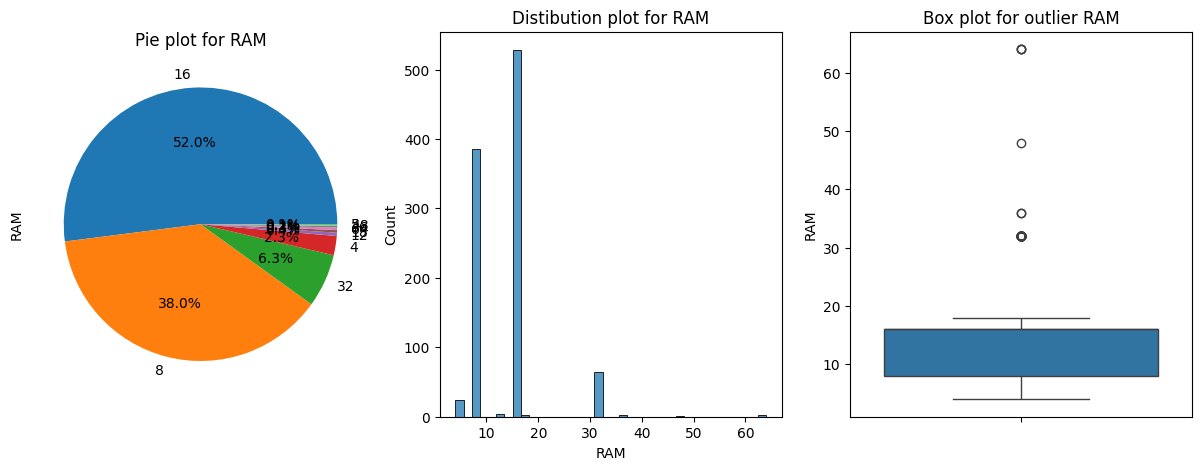

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(131)

plt.title("Pie plot for RAM")
dataset['RAM'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(132)

plt.title("Distibution plot for RAM")
sn.histplot(dataset['RAM'])

plt.subplot(133)

plt.title("Box plot for outlier RAM")
sn.boxplot(dataset['RAM'])

plt.show()

# Analysis

# The majority of laptops (52%) in the dataset have 16 GB of RAM,
# followed by 38% with 8 GB of RAM. Larger RAM capacities such as 32 GB and above constitute a smaller percentage of the dataset,
# with 32 GB being the most common among them at 7%.
# It's important to note that the distribution indicates a prevalence of mid-range RAM capacities (16 GB and 8 GB) in the dataset.

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Outliers
# There are some RAM values >= 30 GB; these values are considered outliers.


<Figure size 1200x400 with 0 Axes>

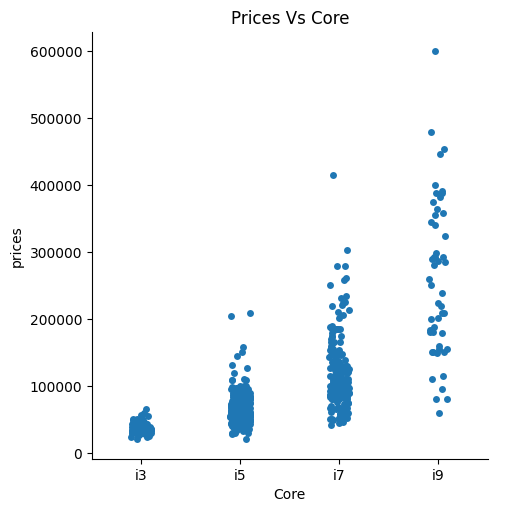

In [122]:
plt.figure(figsize=(12, 4))  # Set the figure size using plt.figure


desired_order = ['i3', 'i5', 'i7', 'i9']  # Replace with your desired order
sn.catplot(data=dataset, x='Core', y='prices', order=desired_order, kind='strip')
plt.title('Prices Vs Core')
plt.show()


# Analysis

# The analysis indicates that, despite having fewer data points,
# laptops with Core i9 processors tend to have significantly higher mean prices compared to other Core types.
# The mean prices for different Core types are as follows:

# Core i3: Mean Price of 37,152.71
# Core i5: Mean Price of 64,898.35
# Core i7: Mean Price of 120,933.13
# Core i9: Mean Price of 259,737.51

# This suggests a positive correlation between the processor type (Core) and the laptop prices, with Core
# i9 laptops having the highest average prices among the observed categories.


In [101]:
# dataset['Core'].value_counts()

i5    329
i7    185
i3    116
i9     51
Name: Core, dtype: int64

In [103]:
# dataset.groupby('Core')['prices'].mean()

Core
i3     37152.706897
i5     64898.349544
i7    120933.129730
i9    259737.509804
Name: prices, dtype: float64

In [104]:
dataset.head(2)

,Brand_name,Brand_detail_name,prices,RAM,Storage,Has_ssd,Core,Gen,Discount_Percentage,Operating_System,Warranty_Period,Space_Score
0,Tecno,Tecno Megabook T1 Laptop,29990,16,512,1,i5,11,32.0,11,1,0
1,Tecno,Tecno Megabook T1 Laptop,23990,8,512,1,i3,11,19.0,11,1,0


In [105]:
dataset['Discount_Percentage'].describe()

count    778.000000
mean       5.420308
std        5.117859
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       38.000000
Name: Discount_Percentage, dtype: float64

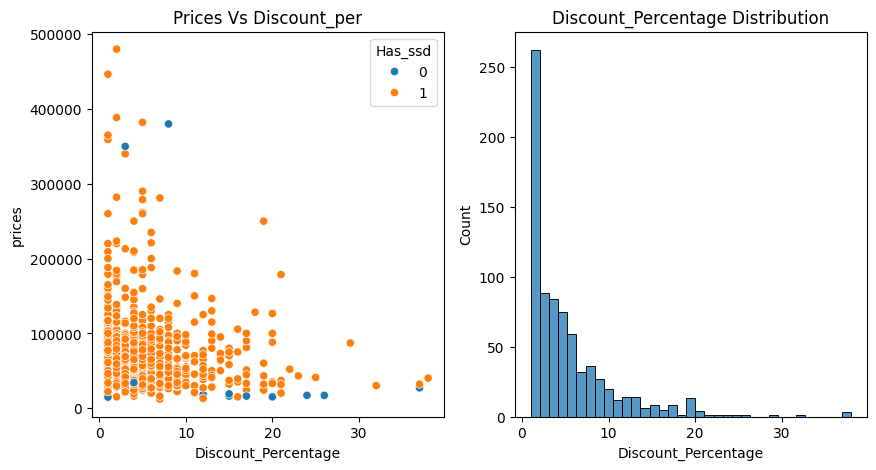

In [124]:
# need to check Discount vs picess plot
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Prices Vs Discount_per')
sn.scatterplot(data=dataset,x='Discount_Percentage',y='prices',hue='Has_ssd')
plt.subplot(122)
plt.title('Discount_Percentage Distribution')
sn.histplot(dataset['Discount_Percentage'])
plt.show()


# Aanalysi

# We can clearly see in the graph that when prices range from >0 to 2 lac, they receive a 0 to 20% discount.
# As prices increase, the discount rate decreases

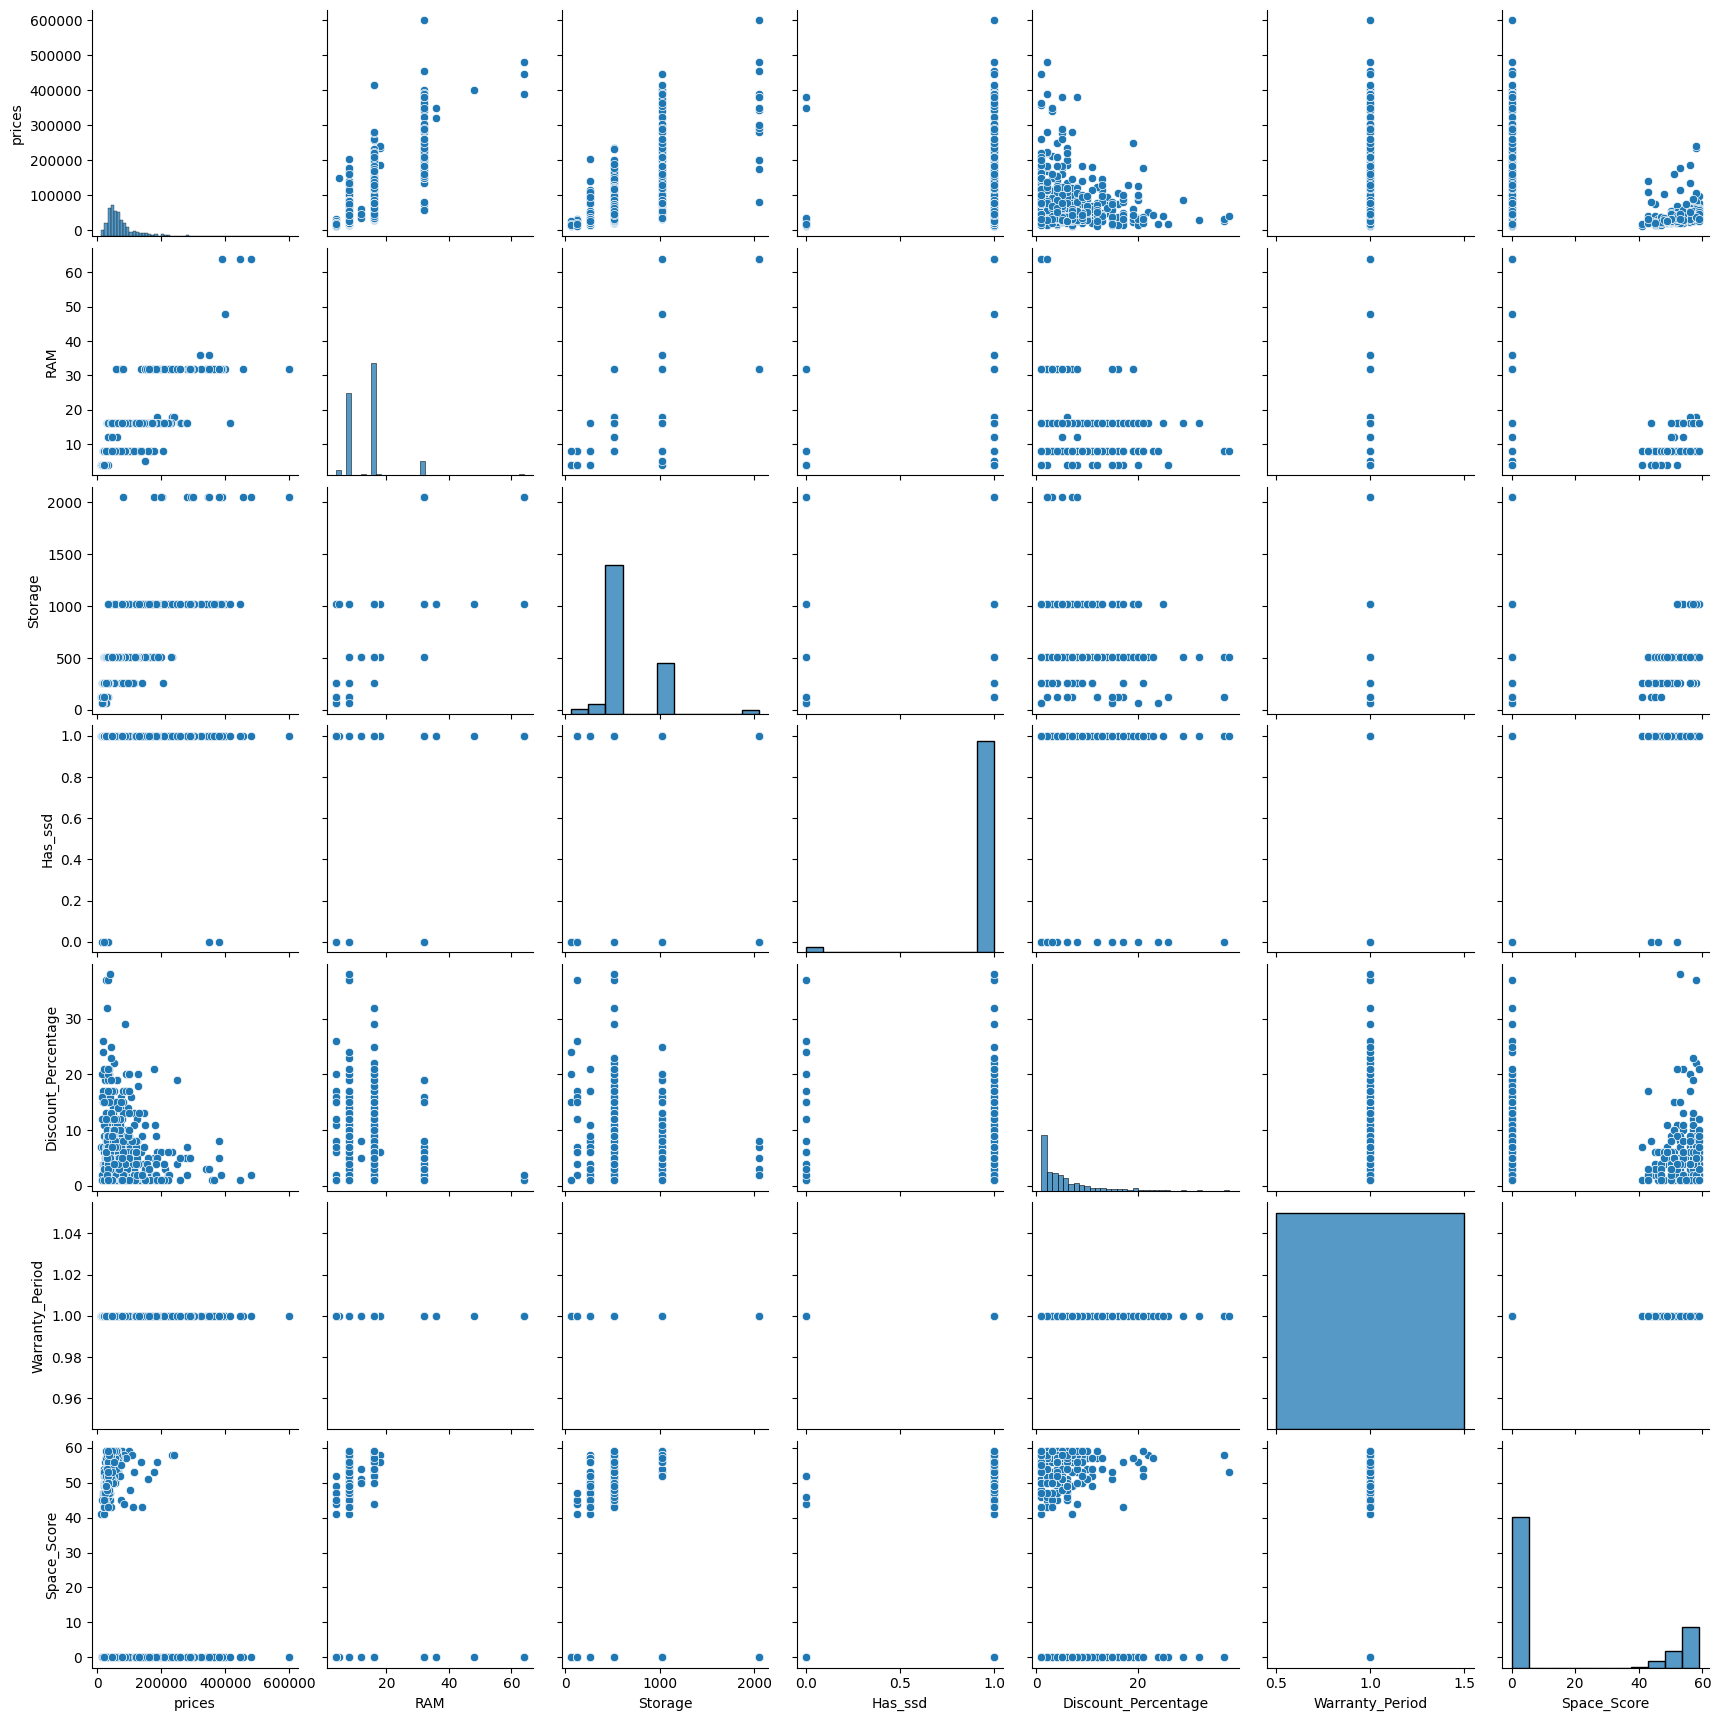

In [113]:
sn.pairplot(dataset)

**"I have completed the cleaning and EDA sections in my notebook. You are welcome to review, suggest changes, and enhance it further. Your feedback will be valuable for improvements.**


